In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

# Understanding the data: data.txt

## 1. Load the dataset (“data.txt“).

In [2]:
column_names = [
    "Feature1",
    "Feature2",
    "Feature3",
    "Feature4",
    "Feature5",
    "Feature6",
    "Feature7",
    "class",
]
df = pd.read_csv("data.txt", sep="\t", header=None, names=column_names)
df

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,class
0,12.10,12.20,0.8000,5.001,2.020,6.158,4.200,1
1,11.90,12.10,0.7800,5.001,2.100,6.210,4.150,1
2,22.00,16.10,0.9500,7.100,4.500,1.100,6.500,1
3,14.00,13.50,0.8711,6.100,3.500,3.000,5.218,1
4,18.05,14.50,0.9200,6.223,3.850,2.050,5.805,1
...,...,...,...,...,...,...,...,...
227,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
228,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
229,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
230,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


## 2. Report the number of features and classes.

In [3]:
num_features = len(df.columns) - 1 
num_classes = df["class"].nunique()

print(f"Number of features: {num_features}")
print(f"Number of classes: {num_classes}")

Number of features: 7
Number of classes: 3


## 3. Visualize your data in 2D planes with a combination of every two features

In [4]:
# features_to_visualize = column_names[:-1]
# feature_combinations = list(permutations(features_to_visualize, 2))

# num_subplots = len(feature_combinations)
# num_cols = 6
# num_rows = (num_subplots + num_cols - 1) // num_cols

# fig, axes = plt.subplots(num_rows, num_cols, figsize=(21, 18))

# if num_rows > 1:
#     axes = axes.flatten()

# for i, (feature_x, feature_y) in enumerate(feature_combinations):
#     ax = axes[i]
#     ax.scatter(data[feature_x], data[feature_y])
#     ax.set_xlabel(feature_x)
#     ax.set_ylabel(feature_y)
#     ax.set_title(f"{feature_x} vs {feature_y}")

# plt.tight_layout()
# plt.show()

## 4. Use Z-score metric to detect outliers. Set threshold equal to 2.75

In [29]:
z_scores = zscore(df.iloc[:, :-1])
outliers_2_75 = (z_scores >= 2.75).any(axis=1)
print("Outliers with threshold 2.75:")
print(df[outliers_2_75])

Outliers with threshold 2.75:
     Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
2       22.00    16.100    0.9500     7.100     4.500     1.100     6.500   
74      23.20    17.200    0.9100     7.200     4.800     2.000     6.800   
86      22.90    17.122    0.9400     7.300     4.780     2.106     6.700   
149     23.25    16.980    0.9300     7.100     4.580     2.100     6.700   
225     12.70    13.410    0.8874     5.183     3.091     8.456     5.000   
229     13.20    13.660    0.8883     5.236     3.232     8.315     5.056   

     class  
2        1  
74       2  
86       2  
149      2  
225      3  
229      3  


In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
my_X = df.iloc[:,:-1].values
my_X = (my_X - np.mean(my_X,axis=0)) / np.std(my_X,axis=0)
# my_X = scaler.fit_transform(my_X)

In [47]:
z_scores

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7
0,-0.923546,-1.721437,-2.066556,-1.273372,-2.545783,1.484622,-2.053280
1,-0.988294,-1.794170,-2.680641,-1.273372,-2.378705,1.517740,-2.139655
2,2.281477,1.115166,2.539084,2.834821,2.633629,-1.736830,1.919965
3,-0.308440,-0.775902,0.116517,0.877607,0.545156,-0.526716,-0.294687
4,1.002706,-0.048568,1.617956,1.118344,1.276121,-1.131773,0.719354
...,...,...,...,...,...,...,...
227,-0.894409,-0.994103,0.337588,-1.007191,-0.538761,-0.124831,-0.895856
228,-1.205199,-1.226849,-0.497568,-1.001319,-0.927217,0.317180,-0.666099
229,-0.567432,-0.659529,0.644631,-0.813427,-0.014554,2.858420,-0.574542
230,-1.007718,-0.986829,-0.466864,-0.932817,-0.841590,-0.145848,-0.595272


In [51]:
my_X

array([[-0.92354562, -1.72143657, -2.06655587, ..., -2.54578306,
         1.48462153, -2.05327975],
       [-0.98829356, -1.79416997, -2.68064117, ..., -2.37870527,
         1.51774045, -2.13965463],
       [ 2.28147736,  1.11516606,  2.53908392, ...,  2.63362853,
        -1.73683046,  1.9199646 ],
       ...,
       [-0.56743196, -0.65952892,  0.64463075, ..., -0.01455449,
         2.85841985, -0.57454186],
       [-1.00771794, -0.98682922, -0.46686365, ..., -0.84158957,
        -0.14584844, -0.59527183],
       [-0.85879768, -0.8922758 ,  0.03361588, ..., -0.55338038,
         1.15279541, -0.56244937]])

In [53]:
np.where(my_X >= 2.75)

(array([  2,  74,  74,  86,  86, 149, 149, 225, 229], dtype=int64),
 array([3, 3, 4, 3, 4, 3, 4, 5, 5], dtype=int64))

## 5. Report the outliers as well as their counts for each class.

In [7]:
outliers_by_class = df[outliers_2_75].groupby("class").size()

print("Outliers by class:")
print(outliers_by_class)

Outliers by class:
class
1    1
2    3
3    2
dtype: int64


## 6. Now change the z-score threshold to 2.5 and 3. How does it impact the outliers you can detect?

In [8]:
outliers_2_5 = (z_scores > 2.5).any(axis=1)
outliers_3 = (z_scores > 3).any(axis=1)

print("Number of outliers with threshold 2.5:", outliers_2_5.sum())
print("Number of outliers with threshold 3:", outliers_3.sum())

Number of outliers with threshold 2.5: 7
Number of outliers with threshold 3: 2


### Answer : when we set higher threshold, the fewer outliers will be detected

## 7. Now look back at your plot from item 3, could you detect the outliers visually?

c:\Users\ParadoX\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


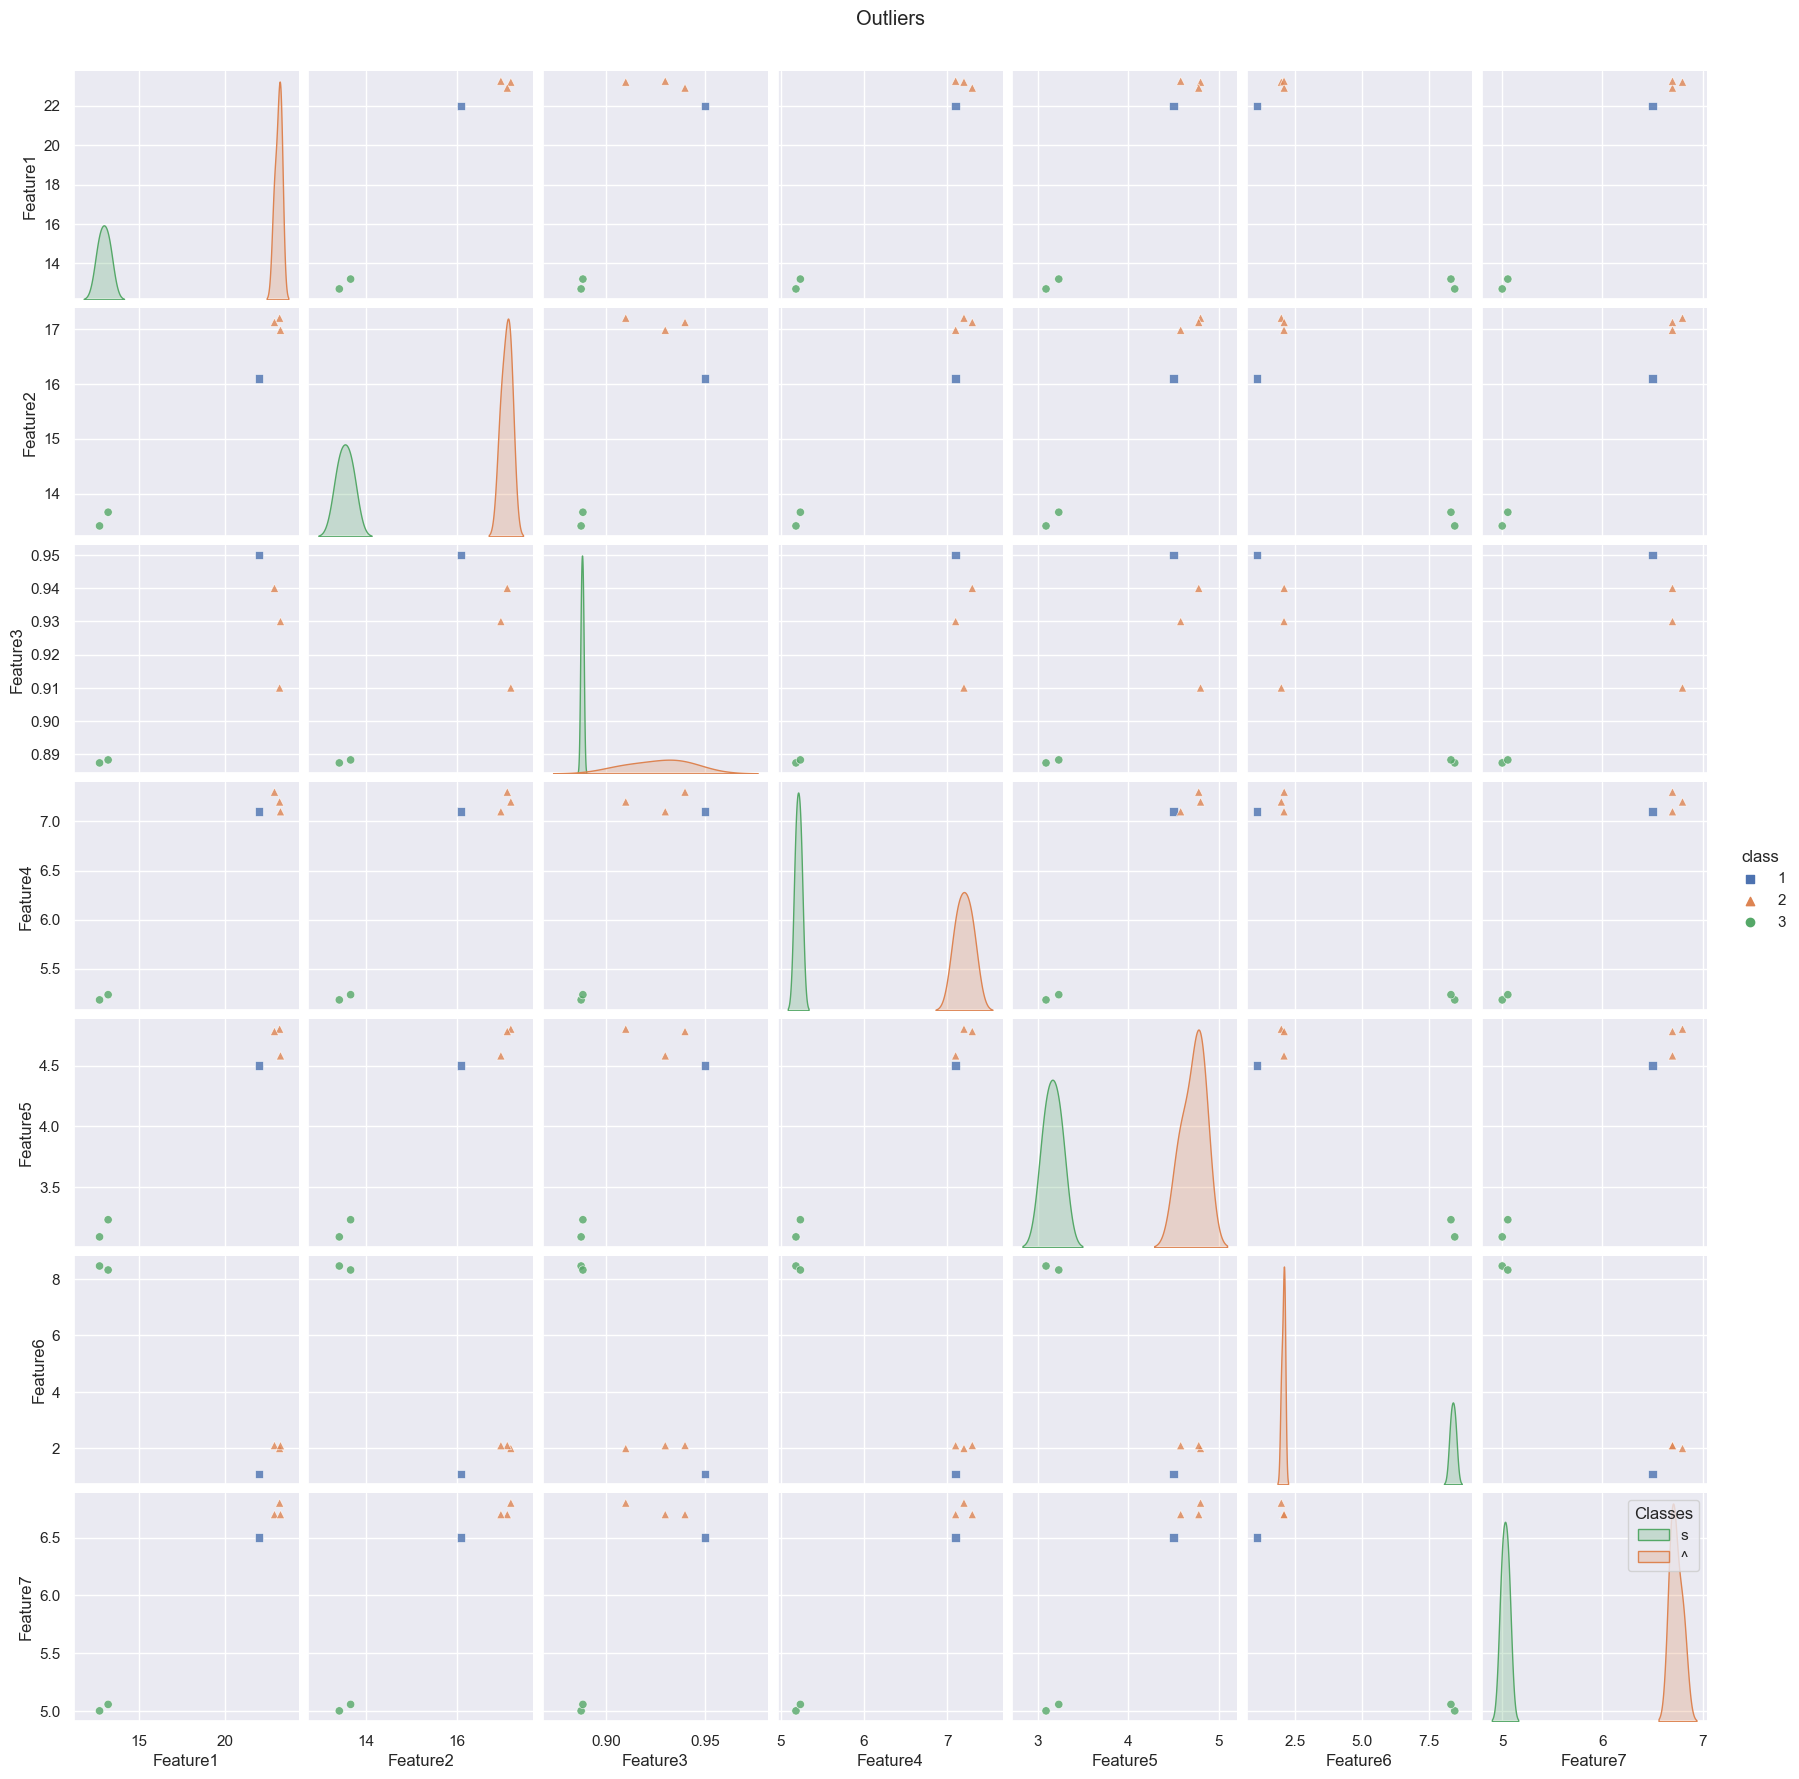

In [9]:
markers = ["s", "^", "o"]

sns.set_theme(style="darkgrid")
sns.pairplot(
    df[outliers_2_75],
    hue="class",
    palette="deep",
    plot_kws={"alpha": 0.8},
    markers=markers,
)

plt.legend(title="Classes", labels=markers)
plt.suptitle("Outliers", y=1.02)
plt.show()

## 8. What other methods can we use to detect the outliers? Explain another method.

1. Detect Outliers Using Standard Deviation
2. Using the Z-Score
3. Detect Outliers Using the Interquartile Range (IQR) (If the data is not normally distributed)
4. Detect Outliers Using Percentile

### Detect Outliers Using Standard Deviation
1. **Calculate Mean (\(\bar{X}\)) and Standard Deviation (\(\sigma\)) of the dataset.**

2. **Calculate Z-scores for each data point:**
   \[ Z = \frac{X_i - \bar{X}}{\sigma} \]

3. **Identify outliers based on a threshold (e.g., 2 or 3 standard deviations):**
   - If \(|Z| > \text{Threshold}\), the data point is an outlier.

4. **Flag or Remove Outliers:**
   - Optionally, flag or remove the identified outliers from the dataset.

*Note: This method assumes a normal distribution and may be sensitive to extreme values. Adjust the threshold as needed for specific data characteristics.*


## 9. Split your data into training and test sets. Consider 75% of your data as training set and 25% as your test set.

In [10]:
X = df.iloc[:, :-1]
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (174, 7) (174,)
Test set shape: (58, 7) (58,)


# Creating our model: OvO, OvA, Softmax Regression

## 1. First implement OvO and OvA algorithms to classify your multi-class dataset. Use logistic regression as the main classifier.

In [11]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [53]:
def generateXvector(X):
    vectorX = np.c_[np.ones((len(X), 1)), X]
    return vectorX


def theta_init(X):
    theta = np.zeros((len(X[0]) + 1, 1))
    return theta


def theta_init_soft(X, num_classes):
    return np.zeros((X.shape[1] + 1, num_classes))


def sigmoid_function(X):
    return 1 / (1 + np.exp(-X))


def Logistics_Regression(
    X, y, learningrate=0.01, iterations=1000, convergence_threshold=1e-6
):
    y_new = np.reshape(y, (len(y), 1))
    cost_lst = []
    vectorX = generateXvector(X)
    theta = theta_init(X)
    m = len(X)
    prev_cost = float("inf")
    iteration = 0
    while True:
        gradients = 2 / m * vectorX.T.dot(sigmoid_function(vectorX.dot(theta)) - y_new)
        theta = theta - learningrate * gradients
        y_pred = sigmoid_function(vectorX.dot(theta))
        epsilon = 1e-15

        cost_value = -np.sum(
            np.dot(y_new.T, np.log(y_pred + epsilon))
            + np.dot((1 - y_new).T, np.log(1 - y_pred + epsilon))
        ) / (len(y_pred))
        cost_lst.append(cost_value)
        iteration += 1
        if abs(prev_cost - cost_value) < convergence_threshold:
            break

        prev_cost = cost_value
    return theta, cost_lst


def softmax_function(z):
    exp_z = np.exp(z)
    return exp_z / (1 + np.sum(exp_z, axis=1, keepdims=True))


def predict_one_vs_all(X, thetas):
    num_classes = len(thetas)
    predictions = np.zeros((X.shape[0], num_classes))

    for cls in range(num_classes):
        theta = thetas[cls]
        linear_output = np.dot(X, theta)
        A = sigmoid_function(linear_output)
        A = np.concatenate(A)
        predictions[:, cls] = A

    final_predictions = np.argmax(predictions, axis=1) + 1

    return final_predictions


def predict_one_vs_one(X, thetas):
    num_classes = len(thetas)
    predictions = np.zeros((X.shape[0], num_classes))

    for cls in range(num_classes):
        theta = thetas[cls][2]
        linear_output = np.dot(X, theta)
        A = sigmoid_function(linear_output)
        A = np.concatenate(A)
        b = np.where(A > 0.5, thetas[cls][0], thetas[cls][1])
        predictions[:, cls] = b
    final_predictions = stats.mode(predictions, axis=1).mode.flatten()

    return final_predictions


def predict_softmax(X, theta):
    logits = X.dot(theta)
    probabilities = softmax_function(logits)
    return np.argmax(probabilities, axis=1)


def calculate_accuracy(predictions, y_true):
    correct_predictions = np.sum(predictions == y_true)
    accuracy = correct_predictions / len(y_true)
    return accuracy

In [54]:
def OvA(X, y, num_classes, plot=False):
    thetas = []
    cost_datas = []
    for cls in range(1, num_classes + 1):
        y_class = np.where(y == cls, 1, 0)
        theta, cost_data = Logistics_Regression(X, y_class)
        if plot:
            plt.plot(np.arange(len(cost_data)), cost_data, label=f"{len(cost_data):,}")
        thetas.append(theta)
        cost_datas.append(cost_data)

    if plot:
        plt.title("Cost Function Graph")
        plt.xlabel("Number of Iterations")
        plt.ylabel("Cost")
        plt.legend()
        plt.grid(True)
        plt.show()

    return thetas, cost_datas


def OvO(X, y, num_classes , plot= False):
    thetas = []
    cost_datas = []
    for i in range(1, num_classes + 1):
        for j in range(i + 1, num_classes + 1):
            y_class = (y == i) | (y == j)
            x_class = X[y_class]
            y_binary = (y[y_class] == i).astype(int)

            theta, cost_data = Logistics_Regression(x_class, y_binary)
            if plot:
                plt.plot(np.arange(len(cost_data)), cost_data, label=f"{len(cost_data):,}")
            thetas.append((i, j, theta))
            cost_datas.append(cost_data)
    if plot:
        plt.title("Cost Function Graph")
        plt.xlabel("Number of Iterations")
        plt.ylabel("Cost")
        plt.legend()
        plt.grid(True)
        plt.show()

    return thetas, cost_datas


def Softmax_Regression(
    X, y, learning_rate=0.01, iterations=1000, convergence_threshold=1e-6, plot=False
):
    y_one_hot = np.eye(np.max(y) + 1)[y]
    cost_lst = []
    vectorX = generateXvector(X)
    num_classes = y_one_hot.shape[1]
    theta = theta_init_soft(X, num_classes)
    m = len(X)
    prev_cost = float("inf")
    iteration = 0

    while True:
        logits = vectorX.dot(theta)
        probabilities = softmax_function(logits)

        error = y_one_hot - probabilities
        gradients = -1 / m * vectorX.T.dot(error)

        theta -= learning_rate * gradients
        epsilon = 1e-15
        cost_value = -np.sum(y_one_hot * np.log(probabilities + epsilon)) / m
        cost_lst.append(cost_value)
        iteration += 1

        if abs(prev_cost - cost_value) < convergence_threshold:
            break

        prev_cost = cost_value

    if plot:
        plt.plot(
            np.arange(len(cost_lst)),
            cost_lst,
            label=f"{len(cost_lst):,}",
        )

        plt.title("Cost Function Graph")
        plt.xlabel("Number of Iterations")
        plt.ylabel("Cost")
        plt.legend()
        plt.grid(True)
        plt.show()

    return theta, cost_lst

### One vs. All

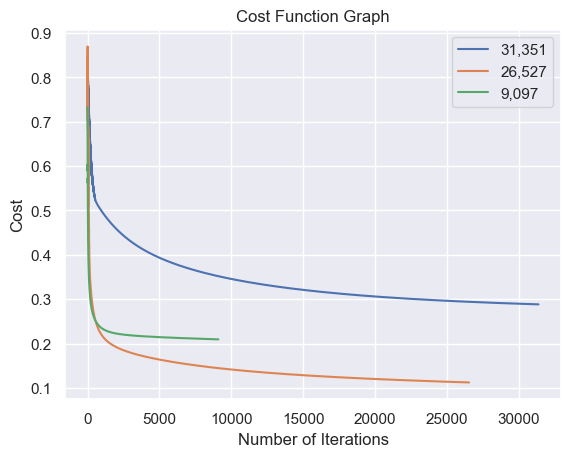

In [55]:
ova_thetas, ova_cost_datas = OvA(X_train, y_train, num_classes, plot=True)

### One vs. One

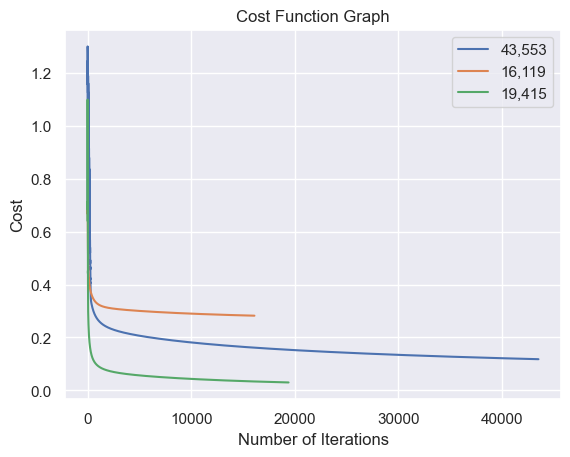

In [56]:
ovo_thetas, ovo_cost_datas = OvO(X_train, y_train, num_classes, plot=True)

## 2. Report train and test accuracy for both methods.


In [57]:
models = ["OVA", "OVO", "Softmax"]
values = {"Train" : 0 , "Test": 0}

accuracy = {k:values.copy() for k in models}


def report_accuracy(prediction_function, X, y, theta):
    predictions = prediction_function(generateXvector(X), theta)
    accuracy = calculate_accuracy(predictions, y)
    return accuracy * 100

### One vs. All

#### Train

In [58]:
accuracy["OVA"]["Train"] = report_accuracy(predict_one_vs_all, X_train , y_train, ova_thetas)
accuracy["OVA"]["Train"]

90.53254437869822

#### Test

In [59]:
accuracy["OVA"]["Test"] = report_accuracy(
    predict_one_vs_all, X_test, y_test, ova_thetas
)
accuracy["OVA"]["Test"]

94.73684210526315

### One vs. One

#### Train

In [60]:
accuracy["OVO"]["Train"] = report_accuracy(
    predict_one_vs_one, X_train, y_train, ovo_thetas
)
accuracy["OVO"]["Train"]

88.75739644970415

#### Test

In [61]:
accuracy["OVO"]["Test"] = report_accuracy(predict_one_vs_one, X_test, y_test, ovo_thetas)
accuracy["OVO"]["Test"]

96.49122807017544

## 4. Finally implement the softmax regression algorithm to classify your dataset. Also report train and test accuracy and plot the cost function.


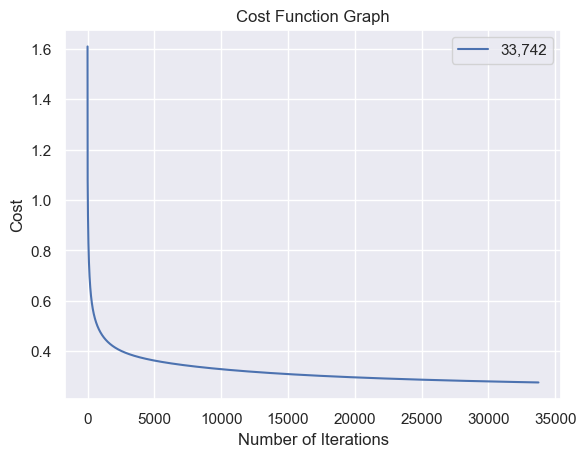

In [62]:
softmax_thetas, softmax_cost_datas = thetas, cost_data = Softmax_Regression(
    X_train, y_train, plot=True
)

#### Train

In [63]:
accuracy["Softmax"]["Train"] = report_accuracy(
    predict_softmax, X_train, y_train, softmax_thetas
)
accuracy["Softmax"]["Train"]

89.3491124260355

#### Test

In [64]:
accuracy["Softmax"]["Test"] = report_accuracy(
    predict_softmax, X_test, y_test, softmax_thetas
)
accuracy["Softmax"]["Test"]

96.49122807017544

## 5. Compare these three classification methods. Which one has the best performance?

In [65]:
for i,j in sorted(accuracy.items(), key=lambda x : (-x[1]["Test"],-x[1]["Train"])):
    print(i,j)

Softmax {'Train': 89.3491124260355, 'Test': 96.49122807017544}
OVO {'Train': 88.75739644970415, 'Test': 96.49122807017544}
OVA {'Train': 90.53254437869822, 'Test': 94.73684210526315}


### Based on the sort of accuracy of models , OVA has best performance

## 6. Do you get better classification performance (better accuracy) by omitting the outliers in any of these three algorithms?

In [66]:
df_without_outliers = df.copy()
df_without_outliers.drop(df_without_outliers.index[outliers_2_75], inplace=True)

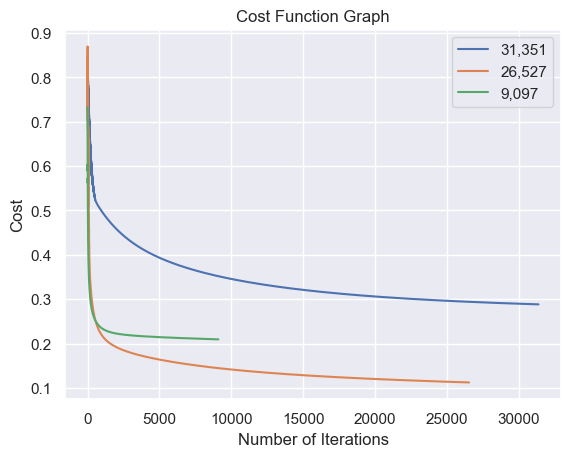

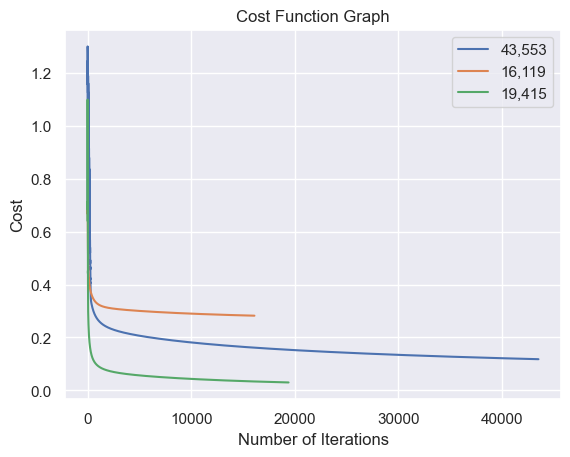

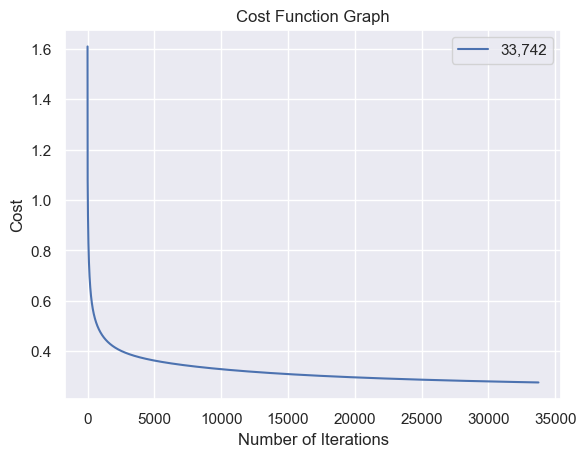

In [67]:
X = df_without_outliers.iloc[:, :-1]
y = df_without_outliers["class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values


ova_thetas, ova_cost_datas = OvA(X_train, y_train, num_classes, plot=True)
ovo_thetas, ovo_cost_datas = OvO(X_train, y_train, num_classes, plot= True)
softmax_thetas, softmax_cost_datas = Softmax_Regression(
    X_train,
    y_train,
    plot=True
)

In [68]:
accuracy_without_outliers = {k: values.copy() for k in models}


In [69]:
accuracy_without_outliers["OVA"]["Train"] = report_accuracy(
    predict_one_vs_all, X_train, y_train, ova_thetas
)
accuracy_without_outliers["OVA"]["Test"] = report_accuracy(
    predict_one_vs_all, X_test, y_test, ova_thetas
)

accuracy_without_outliers["OVO"]["Train"] = report_accuracy(
    predict_one_vs_one, X_train, y_train, ovo_thetas
)
accuracy_without_outliers["OVO"]["Test"] = report_accuracy(
    predict_one_vs_one, X_test, y_test, ovo_thetas
)

accuracy_without_outliers["Softmax"]["Train"] = report_accuracy(
    predict_softmax, X_train, y_train, softmax_thetas
)
accuracy_without_outliers["Softmax"]["Test"] = report_accuracy(
    predict_softmax, X_test, y_test, softmax_thetas
)

In [70]:
print("With Outliers")
for i, j in accuracy.items():
    print(i, j)
print("=" * 80)
print("Without Outliers")
for i, j in accuracy_without_outliers.items():
    print(i, j)

With Outliers
OVA {'Train': 90.53254437869822, 'Test': 94.73684210526315}
OVO {'Train': 88.75739644970415, 'Test': 96.49122807017544}
Softmax {'Train': 89.3491124260355, 'Test': 96.49122807017544}
Without Outliers
OVA {'Train': 90.53254437869822, 'Test': 94.73684210526315}
OVO {'Train': 88.75739644970415, 'Test': 96.49122807017544}
Softmax {'Train': 89.3491124260355, 'Test': 96.49122807017544}


### Based on the new results vs old results, NO!